### computer_vision_project.ipynb

In [1]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

In [2]:
!pip install tensorflow_datasets

In [3]:
import tensorflow_datasets as tfds

In [4]:
tfds.list_builders()

e_cleaned',
 'efron_morris75',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'forest_fires',
 'fuss',
 'gap',
 'geirhos_conflict_stimuli',
 'gem',
 'genomics_ood',
 'german_credit_numeric',
 'gigaword',
 'glue',
 'goemotions',
 'gpt3',
 'gref',
 'groove',
 'gtzan',
 'gtzan_music_speech',
 'hellaswag',
 'higgs',
 'horses_or_humans',
 'howell',
 'i_naturalist2017',
 'imagenet2012',
 'imagenet2012_corrupted',
 'imagenet2012_real',
 'imagenet2012_subset',
 'imagenet_a',
 'imagenet_r',
 'imagenet_resized',
 'imagenet_v2',
 'imagenette',
 'imagewang',
 'imdb_reviews',
 'irc_disentanglement',
 'iris',
 'kitti',
 'kmnist',
 'lambada',
 'lfw',
 'librispeech',
 'librispeech_lm',
 'libritts',
 'ljspeech',
 'lm1b',
 'lost_and_found',
 'lsun',
 'lvis',
 'malaria',
 'math_dataset',
 'mctaco',
 'mlqa',
 'mnist',
 'mnist_corrupted',
 'movie_lens',
 'movie_rationales',
 'movielens',
 'moving_mnist',
 'multi_news',
 'multi_nli',
 'multi_nli_misma

## TensorFlow Datasets
### 사전에 만들어 놓은 머신러닝 데이터셋을 모아둔 것

* 텐서로 이미 데이터를 준비
* 잘 준비된 데이터 정리된 데이터로 실습을 할 수 있다
* 여러가지 데이터 불러오는 방법을 실습할 수 있다.
* 텐서플로 버전이 바뀌면서 새롭게 생기거나 변경된 경우에 빠르게 이 데이터셋으로 테스트를 할 수 있다. 

In [6]:
dataset_list = tfds.list_builders()
print("food101" in dataset_list)

True


In [13]:
(train_data, test_data), dataset_info = tfds.load(
    name="food101", # 우리가 사용할 데이터셋 지정
    split=["train", "test"],  # 데이터셋 나누는 부분
    shuffle_files=True,  # 파일들을 섞어 줄것인지 default = False
    as_supervised=True, # tuple 형태 (data, label) 로 데이터를 다운로드 할 것인지 여부 / False면 dictionary 형태
    with_info=True, # 데이터셋의 메타 정보도 다운로드 (라벨, 샘플의 갯수 등등)
    download=False)

AssertionError: Dataset food101: could not find data in /Users/sangjulee1/tensorflow_datasets. Please make sure to call dataset_builder.download_and_prepare(), or pass download=True to tfds.load() before trying to access the tf.data.Dataset object.

### Windows의 경우 C:\Users\[자신의 아이디]\tensorflow_datasets 에 다운로드 한 후 압축 해제

In [7]:
dataset_info.features

FeaturesDict({
    'id': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [8]:
class_names = dataset_info.features["label"].names
len(class_names)

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
train_one_sample = train_data.take(1) # (image_tensor, label) 
ain_one_sample = train_data.take(1) # (image_tensor, label) 
# as_supervised = Ture 로 설정했기 때문에

In [10]:
train_one_sample

<TakeDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>

In [11]:
type(train_one_sample)

tensorflow.python.data.ops.dataset_ops.TakeDataset

In [12]:
for image, label in train_one_sample:
    print(f"Image shape : {image.shape}")
    print(f"Image dtype : {image.dtype}")
    print(f"Target class : {label}") 
    print(f"class name : {class_names[label.numpy()]}")

Image shape : (32, 32, 3)
Image dtype : <dtype: 'uint8'>
Target class : 8
class name : ship


In [13]:
image

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[203, 214, 234],
        [191, 207, 226],
        [178, 200, 224],
        ...,
        [127, 172, 213],
        [126, 171, 212],
        [124, 170, 211]],

       [[205, 214, 230],
        [186, 199, 213],
        [180, 197, 214],
        ...,
        [132, 178, 219],
        [130, 176, 219],
        [129, 175, 217]],

       [[193, 200, 213],
        [141, 151, 159],
        [124, 137, 145],
        ...,
        [136, 178, 218],
        [134, 177, 218],
        [132, 176, 217]],

       ...,

       [[ 40,  47,  56],
        [ 33,  37,  42],
        [ 31,  35,  41],
        ...,
        [ 73,  99, 132],
        [ 64,  91, 126],
        [ 69,  97, 133]],

       [[ 37,  44,  53],
        [ 31,  34,  40],
        [ 30,  34,  40],
        ...,
        [ 72,  98, 132],
        [ 64,  92, 127],
        [ 68,  96, 132]],

       [[ 34,  41,  50],
        [ 29,  32,  38],
        [ 28,  32,  38],
        ...,
        [ 68,  94, 127]

In [14]:
type(image)

tensorflow.python.framework.ops.EagerTensor

In [15]:
image.ndim # 3차원 텐서

3

In [16]:
import tensorflow as tf

In [17]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=5>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=249>)

(-0.5, 31.5, 31.5, -0.5)

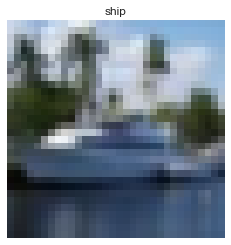

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [19]:
def preprocess_img(image, label, img_shape = 224):
    image = tf.image.resize(image, [img_shape, img_shape])
    return tf.cast(image, tf.float32)

In [20]:
preprocessed_img = preprocess_img(image, label)[0]


In [21]:
print(f"{image[:2]}")
print(f"{preprocessed_img}")


[[[203 214 234]
  [191 207 226]
  [178 200 224]
  [164 188 221]
  [152 177 213]
  [158 184 216]
  [188 210 236]
  [197 215 236]
  [199 213 229]
  [224 234 245]
  [232 238 242]
  [218 227 225]
  [192 205 216]
  [169 186 219]
  [159 182 216]
  [164 190 221]
  [156 184 218]
  [146 178 212]
  [139 177 213]
  [135 178 215]
  [134 177 216]
  [136 176 219]
  [132 176 218]
  [130 178 218]
  [129 176 217]
  [131 173 217]
  [130 173 218]
  [128 174 217]
  [127 173 215]
  [127 172 213]
  [126 171 212]
  [124 170 211]]

 [[205 214 230]
  [186 199 213]
  [180 197 214]
  [174 193 218]
  [162 182 210]
  [195 213 239]
  [215 231 249]
  [205 218 233]
  [203 213 224]
  [186 193 201]
  [173 179 180]
  [170 180 172]
  [138 151 156]
  [170 187 213]
  [171 192 220]
  [170 193 222]
  [162 186 224]
  [158 184 223]
  [152 183 221]
  [147 182 222]
  [143 178 217]
  [140 174 210]
  [139 179 216]
  [136 183 221]
  [134 182 222]
  [134 180 222]
  [136 180 221]
  [135 179 221]
  [133 178 220]
  [132 178 219]
  [130

In [22]:
print(f"{image.shape}")
print(f"{preprocessed_img.shape}")

(32, 32, 3)
(224, 3)


In [23]:
print(f"{image.dtype}")
print(f"{preprocessed_img.dtype}")

<dtype: 'uint8'>
<dtype: 'float32'>
